<font size=4 color='blue'>

# <center> Clase 7, noviembre 11 del 2020 </center>

<font size=4 color='blue'>

# <center> Study topic: Mortality from diabetes </center>

<font size=4 color='blue'>
    
## Information about the topic

<font size=4>

Evolution of diabetes after one year.
    
In the present work, we characterize diabetes with the following ten features: age, sex, body mass index, mean blood pressure, and six measurements of blood serum (S1, S2, S3, S4, S5, S6).

<font size=4 color='blue'>
    
## Quantification of this information

<font size=4>

Information is available on 442 patients (m = 442). The response of interest, Y, is a quantitative measure of disease progression one year after the start of the study. Y values vary between 25 and 346​.

Information source: [diabetes data](https://www4.stat.ncsu.edu/~boos/var.select/diabetes.html)    

Original paper: [Least-Angle-Regression_2004](./Literatura/Least-Angle-Regression_2004.pdf)

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import time

In [3]:
# Data are available in the file diabetes.csv

df = pd.read_csv('diabetes.csv', sep ='\t')

In [4]:
# Showing the first 5 samples (features and target Y)

df.head()

,AGE,SEX,BMI,BP,S1,S2,S3,S4,S5,S6,Y
0,59,2,32.1,101.0,157,93.2,38.0,4.0,4.8598,87,151
1,48,1,21.6,87.0,183,103.2,70.0,3.0,3.8918,69,75
2,72,2,30.5,93.0,156,93.6,41.0,4.0,4.6728,85,141
3,24,1,25.3,84.0,198,131.4,40.0,5.0,4.8903,89,206
4,50,1,23.0,101.0,192,125.4,52.0,4.0,4.2905,80,135


In [5]:
# The describe() method generates a table with statistical information 
# for each of the features and the target.

df.describe()

,AGE,SEX,BMI,BP,S1,S2,S3,S4,S5,S6,Y
count,442.000000,442.000000,442.000000,442.000000,442.000000,442.000000,442.000000,442.000000,442.000000,442.000000,442.000000
mean,48.518100,1.468326,26.375792,94.647014,189.140271,115.439140,49.788462,4.070249,4.641411,91.260181,152.133484
std,13.109028,0.499561,4.418122,13.831283,34.608052,30.413081,12.934202,1.290450,0.522391,11.496335,77.093005
min,19.000000,1.000000,18.000000,62.000000,97.000000,41.600000,22.000000,2.000000,3.258100,58.000000,25.000000
25%,38.250000,1.000000,23.200000,84.000000,164.250000,96.050000,40.250000,3.000000,4.276700,83.250000,87.000000
50%,50.000000,1.000000,25.700000,93.000000,186.000000,113.000000,48.000000,4.000000,4.620050,91.000000,140.500000
75%,59.000000,2.000000,29.275000,105.000000,209.750000,134.500000,57.750000,5.000000,4.997200,98.000000,211.500000
max,79.000000,2.000000,42.200000,133.000000,301.000000,242.400000,99.000000,9.090000,6.107000,124.000000,346.000000


## Histograms are created for each of the features that characterize patients with diabetes:

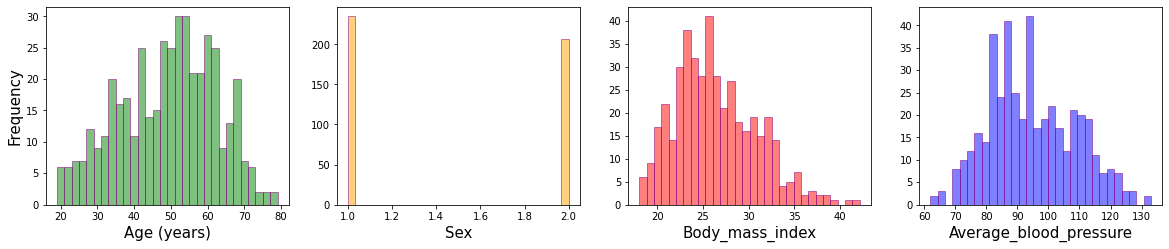

In [6]:
plt.figure(figsize=(20,8)) 

ax1 = plt.subplot(2,4,1)
ax2 = plt.subplot(2,4,2)
ax3 = plt.subplot(2,4,3)
ax4 = plt.subplot(2,4,4)

ax1.hist(df.AGE, bins=30, color='green',edgecolor='purple', alpha=0.5)
ax1.set_xlabel('Age (years)', size=15)
ax1.set_ylabel('Frequency', size=15)

ax2.hist(df.SEX, bins=30, color='orange',edgecolor='purple', alpha=0.5)
ax2.set_xlabel('Sex', size=15)

ax3.hist(df.BMI, bins=30, color='red',edgecolor='purple', alpha=0.5)
ax3.set_xlabel('Body_mass_index', size=15)

ax4.hist(df.BP, bins=30, color='blue',edgecolor='purple', alpha=0.5)
ax4.set_xlabel('Average_blood_pressure', size=15);

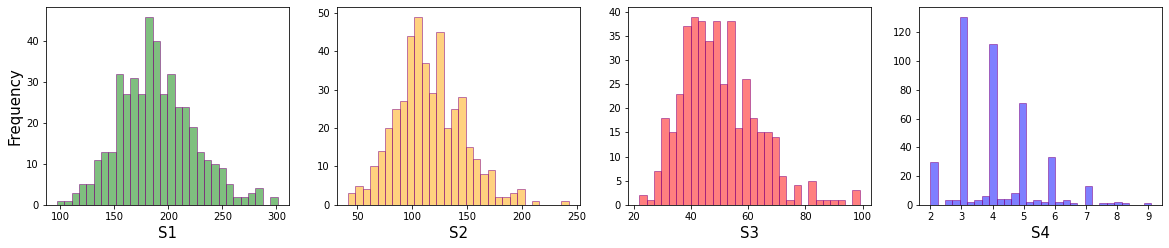

In [7]:
plt.figure(figsize=(20,8)) 

ax1 = plt.subplot(2,4,1)
ax2 = plt.subplot(2,4,2)
ax3 = plt.subplot(2,4,3)
ax4 = plt.subplot(2,4,4)

ax1.hist(df.S1, bins=30, color='green',edgecolor='purple', alpha=0.5)
ax1.set_xlabel('S1', size=15)
ax1.set_ylabel('Frequency', size=15)

ax2.hist(df.S2, bins=30, color='orange',edgecolor='purple', alpha=0.5)
ax2.set_xlabel('S2', size=15)

ax3.hist(df.S3, bins=30, color='red',edgecolor='purple', alpha=0.5)
ax3.set_xlabel('S3', size=15)

ax4.hist(df.S4, bins=30, color='blue',edgecolor='purple', alpha=0.5)
ax4.set_xlabel('S4', size=15);

Text(0.5, 0, 'Y')

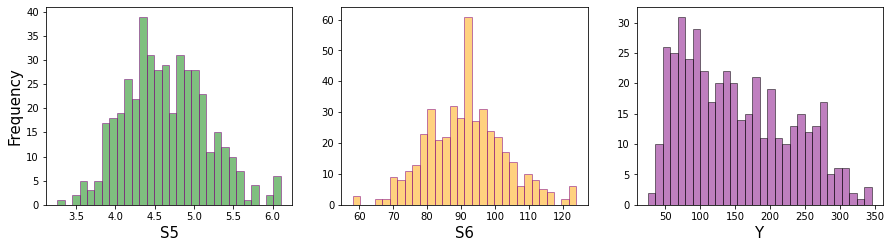

In [8]:
plt.figure(figsize=(15,8)) 

ax1 = plt.subplot(2,3,1)
ax2 = plt.subplot(2,3,2)
ax3 = plt.subplot(2,3,3)

ax1.hist(df.S5, bins=30, color='green',edgecolor='purple', alpha=0.5)
ax1.set_xlabel('S5', size=15)
ax1.set_ylabel('Frequency', size=15)

ax2.hist(df.S6, bins=30, color='orange',edgecolor='purple', alpha=0.5)
ax2.set_xlabel('S6', size=15)

ax3.hist(df.Y, bins=30, color='purple',edgecolor='black', alpha=0.5)
ax3.set_xlabel('Y', size=15)


<font size=4>

To remove any possible correlation between the samples (the rows of the DataFrame), they are randomly reordered.

In [9]:
np.random.seed(1)

df = df.sample(frac=1)

<font size=4>
    
The original samples are divided into 2 sets: 90% for training and 10% for making inferences (predictions) with what has been learned.

In [10]:

test_ratio = 0.1

train_ratio = int((1.0-test_ratio)*len(df.values[:,:]))

df_train = df.iloc[0:train_ratio,:]
df_test  = df.iloc[train_ratio:,:]

In [11]:
print(df_train.shape)
print(df_test.shape)

(397, 11)
(45, 11)


<font size=4>

To work with the models, it is required that all the variables have the same order of magnitude. For this reason, their values are normalized in the samples that are going to be used in training, both the features (X) and the target (Y):

$$x_{norm} = \dfrac{x-\bar{x}}{\sigma}$$

In [12]:
df_train_norm = (df_train - df_train.mean()) / df_train.std()

In [13]:
df_test_norm = (df_test - df_train.mean()) / df_train.std()

<font size=4>
    
Histograms of the variables to be used in the training:

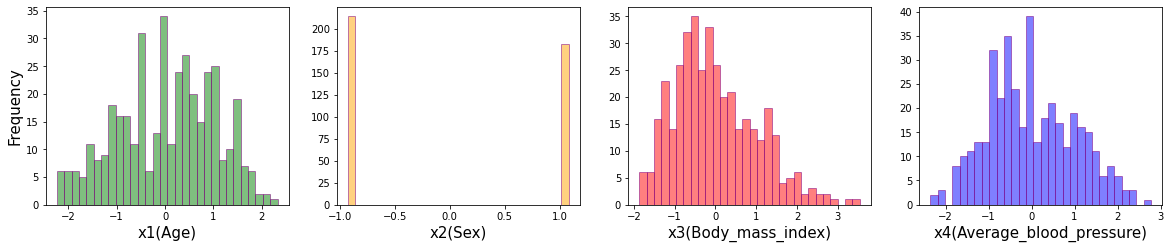

In [14]:
plt.figure(figsize=(20,8)) 

ax1 = plt.subplot(2,4,1)
ax2 = plt.subplot(2,4,2)
ax3 = plt.subplot(2,4,3)
ax4 = plt.subplot(2,4,4)

ax1.hist(df_train_norm.AGE, bins=30, color='green',edgecolor='purple', alpha=0.5)
ax1.set_xlabel('x1(Age)', size=15)
ax1.set_ylabel('Frequency', size=15)

ax2.hist(df_train_norm.SEX, bins=30, color='orange',edgecolor='purple', alpha=0.5)
ax2.set_xlabel('x2(Sex)', size=15)

ax3.hist(df_train_norm.BMI, bins=30, color='red',edgecolor='purple', alpha=0.5)
ax3.set_xlabel('x3(Body_mass_index)', size=15)

ax4.hist(df_train_norm.BP, bins=30, color='blue',edgecolor='purple', alpha=0.5)
ax4.set_xlabel('x4(Average_blood_pressure)', size=15);

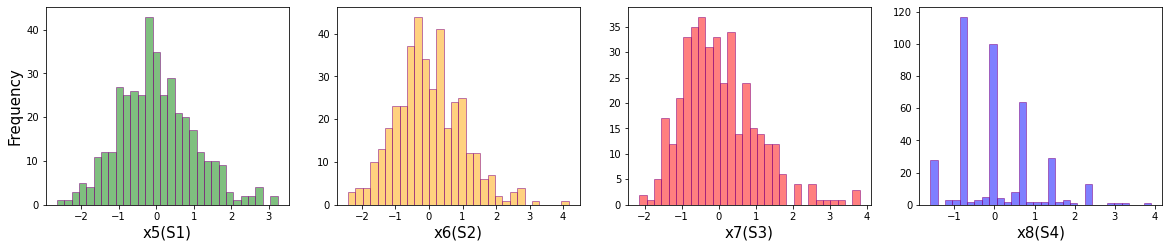

In [15]:
plt.figure(figsize=(20,8)) 

ax1 = plt.subplot(2,4,1)
ax2 = plt.subplot(2,4,2)
ax3 = plt.subplot(2,4,3)
ax4 = plt.subplot(2,4,4)

ax1.hist(df_train_norm.S1, bins=30, color='green',edgecolor='purple', alpha=0.5)
ax1.set_xlabel('x5(S1)', size=15)
ax1.set_ylabel('Frequency', size=15)

ax2.hist(df_train_norm.S2, bins=30, color='orange',edgecolor='purple', alpha=0.5)
ax2.set_xlabel('x6(S2)', size=15)

ax3.hist(df_train_norm.S3, bins=30, color='red',edgecolor='purple', alpha=0.5)
ax3.set_xlabel('x7(S3)', size=15)

ax4.hist(df_train_norm.S4, bins=30, color='blue',edgecolor='purple', alpha=0.5)
ax4.set_xlabel('x8(S4)', size=15);

Text(0.5, 0, 'Y')

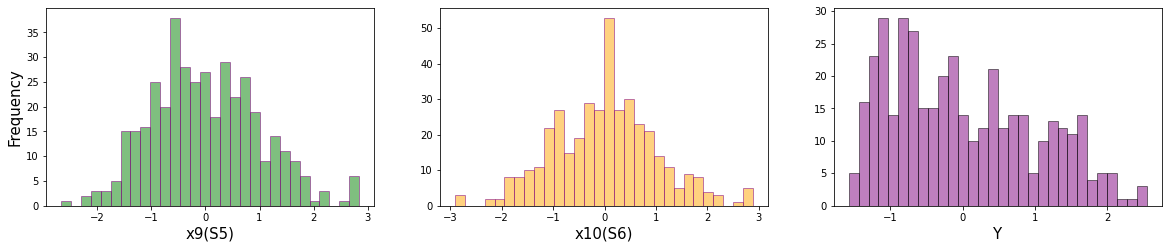

In [16]:
plt.figure(figsize=(20,8)) 

ax1 = plt.subplot(2,3,1)
ax2 = plt.subplot(2,3,2)
ax3 = plt.subplot(2,3,3)

ax1.hist(df_train_norm.S5, bins=30, color='green',edgecolor='purple', alpha=0.5)
ax1.set_xlabel('x9(S5)', size=15)
ax1.set_ylabel('Frequency', size=15)

ax2.hist(df_train_norm.S6, bins=30, color='orange',edgecolor='purple', alpha=0.5)
ax2.set_xlabel('x10(S6)', size=15)

ax3.hist(df_train_norm.Y, bins=30, color='purple',edgecolor='black', alpha=0.5)
ax3.set_xlabel('Y', size=15)


<font size=4>
X and Y values are extracted from the columns of the DataFrame.

In [17]:
train_x = df_train_norm.values[:,:-1]
train_y = df_train_norm.values[:,-1:]

In [18]:
test_x = df_test_norm.values[:,:-1]
test_y = df_test_norm.values[:,-1:]

In [19]:
print(train_x.shape)
print(train_y.shape)
print(test_x.shape)
print(test_y.shape)

(397, 10)
(397, 1)
(45, 10)
(45, 1)


<font size=5 color='blue'>

# <center> Modeling different learning systems </center>




<font size=4 color='blue'>

# <center> Implemented using the Keras framework as frontend </center>


<font size=4 color='mediumvioletred'>
   
[Keras](https://keras.io/)

In [2]:
from keras.models import Sequential
from keras.layers import Input, Dense
from keras.layers import Activation
from keras.optimizers import SGD
from keras.models import Model
from keras.utils import plot_model
from keras import initializers
from keras import optimizers
import tensorflow as tf

Using TensorFlow backend.


[Sequential](https://keras.io/guides/sequential_model/)

[layers](https://keras.io/api/layers/): [Dense](https://keras.io/api/layers/core_layers/dense/), [Activation](https://keras.io/api/layers/activations/#relu-function)

[Optimizers](https://keras.io/api/optimizers/#available-optimizers)

[utils](https://keras.io/api/utils/)

[Keras API reference](https://keras.io/api/)

<font size=4 color='black'>

The features that determine the phenomenon are described by the vector  $X = (x_1, x_2, x_3, ...x_k,...x_K)$ and is called a feature vector.
    
The model assumes that the output $y$ varies linearly with each feature
    $$ F(X) = \sum_{k=1}^K w_k*x_k + b$$

<font size=5 color='blue'>

First model: The output $y$ depends linearly on each of the features.

In [20]:
import networkx as nx

class Network(object):
    
    def  __init__ (self,sizes):
        self.num_layers = len(sizes)
        print("It has", self.num_layers, "layers,")
        self.sizes = sizes
        print("with the following number of nodes per layer",self.sizes)
        self.biases = [np.random.randn(y, 1) for y in sizes[1:]]
        self.weights = [np.random.randn(y, x)
                        for x, y in zip(sizes[:-1], sizes[1:])]
        
    def feedforward(self, x_of_sample):
        """Return the output of the network F(x_of_sample) """        
        for b, w in zip(self.biases, self.weights):
            x_of_sample = sigmoid(np.dot(w, x_of_sample)+b)
        return x_of_sample
    
    def graph(self,sizes):
        a=[]
        ps={}
        Q = nx.Graph()
        for i in range(len(sizes)):
            Qi=nx.Graph()    
            n=sizes[i]
            nodos=np.arange(n)
            Qi.add_nodes_from(nodos)
            l_i=Qi.nodes
            Q = nx.union(Q, Qi, rename = (None, 'Q%i-'%i))
            if len(l_i)==1:
                ps['Q%i-0'%i]=[i/(len(sizes)), 1/2]
            else:
                for j in range(len(l_i)+1):
                    ps['Q%i-%i'%(i,j)]=[i/(len(sizes)),(1/(len(l_i)*len(l_i)))+(j/(len(l_i)))]
            a.insert(i,Qi)
        for i in range(len(a)-1):
            for j in range(len(a[i])):
                for k in range(len(a[i+1])):
                    Q.add_edge('Q%i-%i' %(i,j),'Q%i-%i' %(i+1,k))            
        nx.draw(Q, pos = ps)
                

It has 2 layers,
with the following number of nodes per layer [10, 1]


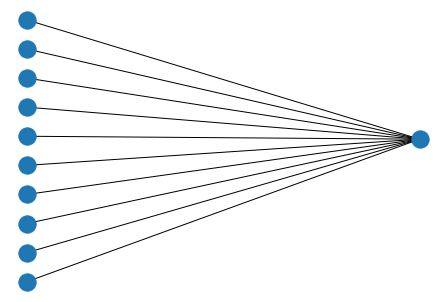

In [21]:
n_x = train_x.shape[1] 
n_y = train_y.shape[1]
    
layers = [n_x, n_y]
net = Network(layers)
net.graph(layers)

<font size=5 color='blue'>
    
Definition of architecture. 
    
It includes the initialization of weights and biases, as well as the activation functions.

In [22]:
np.random.seed(1)

input_nodes = n_x     # The input layer has n_x nodes
output_nodes = n_y    # The output layer has n_y nodes

linear_model = Sequential()

# For the first layer, you need to indicate its input layer, which corresponds to
# the input layer of the network.

linear_model.add(Dense(output_nodes,  kernel_initializer='uniform', bias_initializer='zeros', \
                input_dim=input_nodes, activation='linear'))

<font size=4>
    
  **Parameter Initialization** Strategies

Training algorithms for deep learning models are usually iterative in nature and thus require the user to specify some initial point from which to begin the iterations. Moreover, training deep models is a sufficiently difficult task that most algorithms are strongly affected by the choice of initialization. The initial point can determine whether the algorithm converges at all, with some initial points being so unstable that the algorithm encounters numerical difficulties and fails altogether. When learning does converge, the initial point can determine how quickly learning converges and whether it converges to a point with high or low cost. Also, points of comparable cost can have wildly varying generalization error, and the initial point can affect the generalization as well.

     Yoshua Bengio, Aaron Courville, Ian Goodfellow. Deep Learning. pp 301

<font size=5 color='blue'>
Architecture Summary and Chart

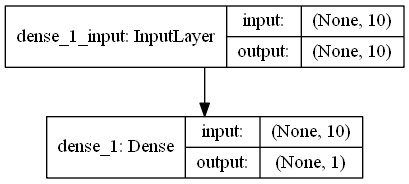

In [23]:
plot_model(linear_model, to_file='linear_model.png', show_shapes=True, rankdir='TB', 
           expand_nested=True, show_layer_names=True, dpi=96)

In [29]:
#help(plot_model)

In [24]:
linear_model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 1)                 11        
Total params: 11
Trainable params: 11
Non-trainable params: 0
_________________________________________________________________


<font size=5  color='blue'>
    
Compiling the model. Includes the optimizer definition

In [25]:
# We define the optimizing function and their hyperparameters: learining rate(lr), 
# decay, momentum and nesterov (whether to apply Nesterov gradient)

sgd = optimizers.SGD(lr=0.01, momentum=0.0, nesterov=False)

linear_model.compile(loss='mean_squared_error', optimizer=sgd)

<font size=4>

**Stochastic gradient descent (SGD)** is an extension of the gradient descent algorithm.

A recurring problem in machine learning is that large training sets are necessary for good generalization, but large training sets are also more computationally expensive.

The insight of stochastic gradient descent is that the gradient is an expectation. The expectation may be approximately estimated using a small set of samples. Specifically, on each step of the algorithm, we can sample a minibatch of examples.
    
    Yoshua Bengio, Aaron Courville, Ian Goodfellow. Deep Learning. pp 151


<font size=5 color='blue'>
    
Training the learning system

In [26]:
# 10 % of the training data will be used to validate the training
validation_portion = 0.1
epochs = 600

history = linear_model.fit(train_x, train_y, epochs=epochs, validation_split = validation_portion, verbose=1)

# the "history" object contains the information generated during the training

Train on 357 samples, validate on 40 samples
Epoch 1/600
357/357 [==============================] - 2s 5ms/step - loss: 0.8110 - val_loss: 0.6686
Epoch 2/600
357/357 [==============================] - 0s 109us/step - loss: 0.6300 - val_loss: 0.5736
Epoch 3/600
357/357 [==============================] - 0s 401us/step - loss: 0.5759 - val_loss: 0.5310
Epoch 4/600
357/357 [==============================] - 0s 325us/step - loss: 0.5499 - val_loss: 0.5086
Epoch 5/600
357/357 [==============================] - 0s 104us/step - loss: 0.5365 - val_loss: 0.5017
Epoch 6/600
357/357 [==============================] - 0s 255us/step - loss: 0.5285 - val_loss: 0.4845
Epoch 7/600
357/357 [==============================] - 0s 381us/step - loss: 0.5198 - val_loss: 0.4776
Epoch 8/600
357/357 [==============================] - 0s 120us/step - loss: 0.5170 - val_loss: 0.4695
Epoch 9/600
357/357 [==============================] - 0s 294us/step - loss: 0.5140 - val_loss: 0.4580
Epoch 10/600
357/357 [========

C:\Users\hp\Anaconda3\envs\tf\lib\site-packages\keras\callbacks\callbacks.py:95: RuntimeWarning: Method (on_train_batch_end) is slow compared to the batch update (0.114007). Check your callbacks.
  % (hook_name, delta_t_median), RuntimeWarning)


357/357 [==============================] - 0s 255us/step - loss: 0.5088 - val_loss: 0.4452
Epoch 81/600
357/357 [==============================] - 0s 101us/step - loss: 0.5086 - val_loss: 0.4408
Epoch 82/600
357/357 [==============================] - 0s 451us/step - loss: 0.5085 - val_loss: 0.4444
Epoch 83/600
357/357 [==============================] - 0s 224us/step - loss: 0.5081 - val_loss: 0.4460
Epoch 84/600
357/357 [==============================] - 0s 101us/step - loss: 0.5092 - val_loss: 0.4430
Epoch 85/600
357/357 [==============================] - 0s 314us/step - loss: 0.5077 - val_loss: 0.4437
Epoch 86/600
357/357 [==============================] - 0s 258us/step - loss: 0.5082 - val_loss: 0.4479
Epoch 87/600
357/357 [==============================] - 0s 112us/step - loss: 0.5104 - val_loss: 0.4477
Epoch 88/600
357/357 [==============================] - 0s 305us/step - loss: 0.5083 - val_loss: 0.4503
Epoch 89/600
357/357 [==============================] - 0s 249us/step - loss:

C:\Users\hp\Anaconda3\envs\tf\lib\site-packages\keras\callbacks\callbacks.py:95: RuntimeWarning: Method (on_train_batch_end) is slow compared to the batch update (0.100006). Check your callbacks.
  % (hook_name, delta_t_median), RuntimeWarning)


357/357 [==============================] - 0s 373us/step - loss: 0.5081 - val_loss: 0.4619
Epoch 223/600
357/357 [==============================] - 0s 112us/step - loss: 0.5075 - val_loss: 0.4683
Epoch 224/600
357/357 [==============================] - 0s 322us/step - loss: 0.5093 - val_loss: 0.4603
Epoch 225/600
357/357 [==============================] - 0s 361us/step - loss: 0.5074 - val_loss: 0.4572
Epoch 226/600
357/357 [==============================] - 0s 112us/step - loss: 0.5071 - val_loss: 0.4647
Epoch 227/600
357/357 [==============================] - 0s 317us/step - loss: 0.5079 - val_loss: 0.4599
Epoch 228/600
357/357 [==============================] - 0s 261us/step - loss: 0.5067 - val_loss: 0.4590
Epoch 229/600
357/357 [==============================] - 0s 104us/step - loss: 0.5082 - val_loss: 0.4554
Epoch 230/600
357/357 [==============================] - 0s 431us/step - loss: 0.5080 - val_loss: 0.4569
Epoch 231/600
357/357 [==============================] - 0s 277us/ste

C:\Users\hp\Anaconda3\envs\tf\lib\site-packages\keras\callbacks\callbacks.py:95: RuntimeWarning: Method (on_train_batch_end) is slow compared to the batch update (0.120007). Check your callbacks.
  % (hook_name, delta_t_median), RuntimeWarning)


Epoch 235/600
357/357 [==============================] - 0s 98us/step - loss: 0.5076 - val_loss: 0.4437
Epoch 236/600
357/357 [==============================] - 0s 120us/step - loss: 0.5067 - val_loss: 0.4430
Epoch 237/600
357/357 [==============================] - 0s 252us/step - loss: 0.5073 - val_loss: 0.4428
Epoch 238/600
357/357 [==============================] - 0s 300us/step - loss: 0.5069 - val_loss: 0.4465
Epoch 239/600
357/357 [==============================] - 0s 123us/step - loss: 0.5064 - val_loss: 0.4438
Epoch 240/600
357/357 [==============================] - 0s 280us/step - loss: 0.5059 - val_loss: 0.4397
Epoch 241/600
357/357 [==============================] - 0s 294us/step - loss: 0.5065 - val_loss: 0.4425
Epoch 242/600
357/357 [==============================] - 0s 104us/step - loss: 0.5079 - val_loss: 0.4395
Epoch 243/600
357/357 [==============================] - 0s 286us/step - loss: 0.5076 - val_loss: 0.4453
Epoch 244/600
357/357 [==============================] -

C:\Users\hp\Anaconda3\envs\tf\lib\site-packages\keras\callbacks\callbacks.py:95: RuntimeWarning: Method (on_train_batch_end) is slow compared to the batch update (0.101006). Check your callbacks.
  % (hook_name, delta_t_median), RuntimeWarning)


357/357 [==============================] - 0s 123us/step - loss: 0.5067 - val_loss: 0.4566
Epoch 252/600
357/357 [==============================] - 0s 104us/step - loss: 0.5091 - val_loss: 0.4508
Epoch 253/600
357/357 [==============================] - 0s 317us/step - loss: 0.5079 - val_loss: 0.4608
Epoch 254/600
357/357 [==============================] - 0s 389us/step - loss: 0.5087 - val_loss: 0.4553
Epoch 255/600
357/357 [==============================] - 0s 106us/step - loss: 0.5076 - val_loss: 0.4482
Epoch 256/600
357/357 [==============================] - 0s 347us/step - loss: 0.5071 - val_loss: 0.4499
Epoch 257/600
357/357 [==============================] - 0s 140us/step - loss: 0.5084 - val_loss: 0.4468
Epoch 258/600
357/357 [==============================] - 0s 106us/step - loss: 0.5066 - val_loss: 0.4489
Epoch 259/600
357/357 [==============================] - 0s 193us/step - loss: 0.5073 - val_loss: 0.4476
Epoch 260/600
357/357 [==============================] - 0s 115us/ste

357/357 [==============================] - 0s 120us/step - loss: 0.5070 - val_loss: 0.4583
Epoch 406/600
357/357 [==============================] - 0s 112us/step - loss: 0.5074 - val_loss: 0.4586
Epoch 407/600
357/357 [==============================] - 0s 151us/step - loss: 0.5057 - val_loss: 0.4525
Epoch 408/600
357/357 [==============================] - 0s 118us/step - loss: 0.5059 - val_loss: 0.4498
Epoch 409/600
357/357 [==============================] - 0s 129us/step - loss: 0.5052 - val_loss: 0.4503
Epoch 410/600
357/357 [==============================] - 0s 154us/step - loss: 0.5063 - val_loss: 0.4389
Epoch 411/600
357/357 [==============================] - 0s 104us/step - loss: 0.5059 - val_loss: 0.4404
Epoch 412/600
357/357 [==============================] - 0s 160us/step - loss: 0.5068 - val_loss: 0.4428
Epoch 413/600
357/357 [==============================] - 0s 118us/step - loss: 0.5065 - val_loss: 0.4473
Epoch 414/600
357/357 [==============================] - 0s 106us/ste

Epoch 483/600
357/357 [==============================] - 0s 115us/step - loss: 0.5052 - val_loss: 0.4481
Epoch 484/600
357/357 [==============================] - 0s 126us/step - loss: 0.5055 - val_loss: 0.4490
Epoch 485/600
357/357 [==============================] - 0s 148us/step - loss: 0.5051 - val_loss: 0.4488
Epoch 486/600
357/357 [==============================] - 0s 109us/step - loss: 0.5050 - val_loss: 0.4484
Epoch 487/600
357/357 [==============================] - 0s 162us/step - loss: 0.5058 - val_loss: 0.4511
Epoch 488/600
357/357 [==============================] - 0s 109us/step - loss: 0.5064 - val_loss: 0.4526
Epoch 489/600
357/357 [==============================] - 0s 104us/step - loss: 0.5064 - val_loss: 0.4534
Epoch 490/600
357/357 [==============================] - 0s 162us/step - loss: 0.5050 - val_loss: 0.4533
Epoch 491/600
357/357 [==============================] - 0s 115us/step - loss: 0.5051 - val_loss: 0.4512
Epoch 492/600
357/357 [==============================] 

Epoch 560/600
357/357 [==============================] - 0s 104us/step - loss: 0.5092 - val_loss: 0.4531
Epoch 561/600
357/357 [==============================] - 0s 190us/step - loss: 0.5086 - val_loss: 0.4467
Epoch 562/600
357/357 [==============================] - 0s 112us/step - loss: 0.5054 - val_loss: 0.4528
Epoch 563/600
357/357 [==============================] - 0s 106us/step - loss: 0.5059 - val_loss: 0.4533
Epoch 564/600
357/357 [==============================] - 0s 154us/step - loss: 0.5046 - val_loss: 0.4451
Epoch 565/600
357/357 [==============================] - 0s 112us/step - loss: 0.5052 - val_loss: 0.4406
Epoch 566/600
357/357 [==============================] - 0s 123us/step - loss: 0.5053 - val_loss: 0.4427
Epoch 567/600
357/357 [==============================] - 0s 109us/step - loss: 0.5061 - val_loss: 0.4432
Epoch 568/600
357/357 [==============================] - 0s 129us/step - loss: 0.5060 - val_loss: 0.4445
Epoch 569/600
357/357 [==============================] 

In [27]:
history.history

{'val_loss': [0.6685838460922241,
  0.5735610485076904,
  0.5309622049331665,
  0.5085879445075989,
  0.5016846895217896,
  0.4844557881355286,
  0.4775680065155029,
  0.4694507002830505,
  0.4580033779144287,
  0.4527979135513306,
  0.45843507051467897,
  0.4599607467651367,
  0.45278908014297486,
  0.455243182182312,
  0.45119261741638184,
  0.4496633291244507,
  0.4514476299285889,
  0.45653400421142576,
  0.460845947265625,
  0.4618938326835632,
  0.45666385889053346,
  0.46023484468460085,
  0.4625098466873169,
  0.4509319067001343,
  0.45144768953323366,
  0.44649829864501955,
  0.44417041540145874,
  0.4424735546112061,
  0.4408016800880432,
  0.4424156188964844,
  0.4449097394943237,
  0.44821844100952146,
  0.44602127075195314,
  0.4432676792144775,
  0.44783792495727537,
  0.44910807609558107,
  0.44789657592773435,
  0.4485002398490906,
  0.4372406482696533,
  0.43222970962524415,
  0.4337333798408508,
  0.43309569358825684,
  0.4367262005805969,
  0.43922038078308107,
  0.4

<font size=5 color='blue'>

Plots of the cost function versus epoch    

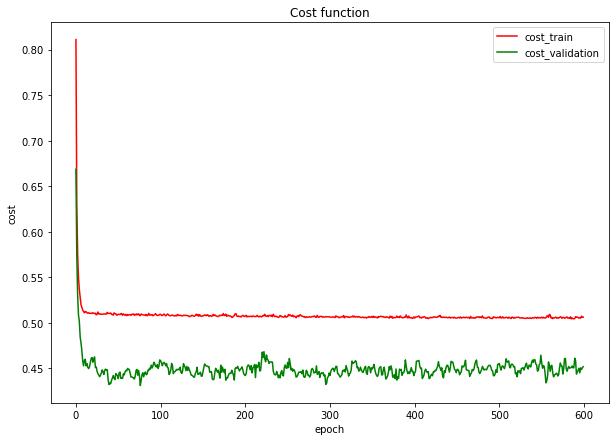

In [28]:
plt.figure(figsize=(10, 7))

plt.plot(history.history['loss'], color='red')
plt.plot(history.history['val_loss'], color='green')
plt.title('Cost function')
plt.ylabel('cost')
plt.xlabel('epoch')
plt.legend(['cost_train', 'cost_validation'])
plt.show()


<font size=4>

The factors determining how well a machine learning algorithm will perform are its ability to:

1. Make the training error small.
2. Make the gap between training and test error small.

**Underfitting** occurs when the model is not able to obtain a sufficiently low error value on the training set.

**Overfitting** occurs when the gap between the training error and test error is too large.
<img src='images\bengio.png'>



    
    Yoshua Bengio, Aaron Courville, Ian Goodfellow. Deep Learning. pp 111
    
    
<font size=4>
    
When we compare the training and validation errors, we want to be mindful of two common situations. First, we want to watch out for cases when our training error and validation error are both substantial but there is a little gap between them. If the model is unable to reduce the training error, that could mean that our model is too simple (i.e., insufficiently expressive) to capture the pattern that we are trying to model. Moreover, since the generalization gap between our training and validation errors is small, we have reason to believe that we could get away with a more complex model. This phenomenon is known as **underfitting**.

On the other hand, as we discussed above, we want to watch out for the cases when our training error is significantly lower than our validation error, indicating severe **overfitting**. Note that overfitting is not always a bad thing. With deep learning especially, it is well known that the best predictive models often perform far better on training data than on holdout data. Ultimately, we usually care more about the validation error than about the gap between the training and validation errors.
    
 <img src='images\dive.png'>
 
 

    
     Aston Zhang, Zachary C. Lipton, Mu Li, and Alexander J. Smola. Dive into Deep Learning. pp 146

<font size=5 color='blue'>

Underfitting

In [29]:
#history_model.history

NameError: name 'history_model' is not defined

<font size = 5 color = 'blue'>
    
Evaluation of the learning. 
    
This is done using the test data.

In [30]:
preds = linear_model.evaluate(x=test_x, y=test_y)

print ("Loss = " + str(preds))

45/45 [==============================] - 0s 511us/step
Loss = 0.4985242062144809


<font size=5 color='blue'>
    
# <center> ---The following is a new model--- </center> 

<font size=5 color='blue'>

Second model: The output $y$ does not depend linearly with the features. 
This fact is modeled with a sigmoid type function; for example, a hyperbolic tangent

<font size=4 color='black'>

The features that determine the phenomenon are described by the vector  $X = (x_1, x_2, x_3, ...x_k,...x_K)$
    
The our model assumes that the output y varies linearly with each feature
    $$ z = \sum_{k=1}^K w_k*x_k + b$$
    $$ F(X) = tanh(z)= \frac{{e}^{2z} - 1}{{e}^{2z} + 1}$$

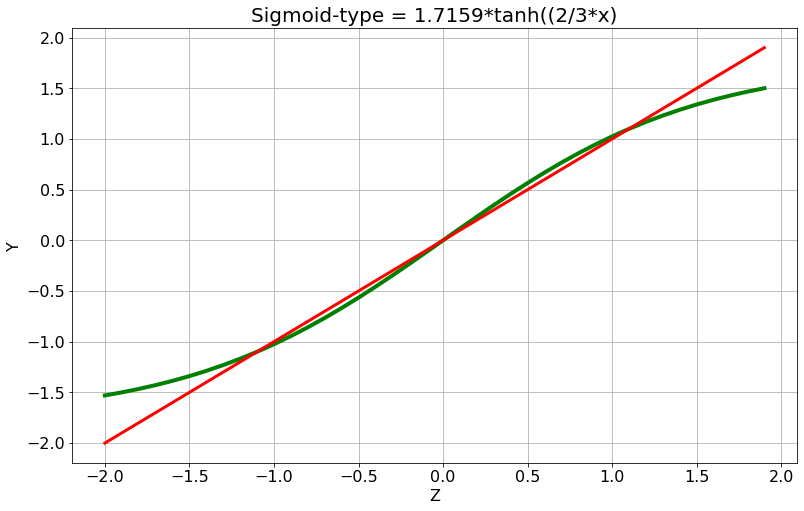

In [31]:
def tanh(z):
    return (np.exp(2*z)- 1)/(np.exp(2*z)+1)

# The following array is generated for plotting the hyperbolic tangent function
x1 = np.arange(-2, 2.0, 0.1)
y1 = 1.759*tanh((2/3*x1))

y2 = x1
#Samples and function F are plotted
plt.figure(figsize=(13,8))

plt.rc('xtick', labelsize=16)
plt.rc('ytick', labelsize=16)
plt.rc('legend', fontsize=16)
plt.ylabel('Y', fontsize=16)
plt.xlabel('Z', fontsize=16)
plt.grid(True)
plt.title('Sigmoid-type = 1.7159*tanh((2/3*x)', size=20)

#Plotting function
plt.plot(x1, y1, color='green', lw=4)
plt.plot(x1, y2, color='red', lw=3)

plt.show()

It has 2 layers,
with the following number of nodes per layer [10, 1]


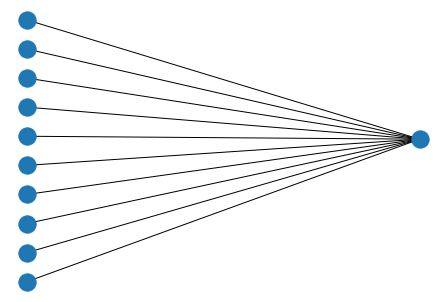

In [32]:
n_x = train_x.shape[1] 
n_y = train_y.shape[1]
    
layers = [n_x, n_y]
net = Network(layers)
net.graph(layers)

<font size=5 color='blue'>
    
Model architecture 


In [33]:
np.random.seed(1)

input_nodes = n_x     # The input layer has n_x nodes
output_nodes = n_y    # The output layer has n_y nodes

sigmoid_model = Sequential()

sigmoid_model.add(Dense(output_nodes,  kernel_initializer='uniform', bias_initializer='zeros', \
                input_dim=input_nodes, activation='tanh'))


<font size=5 color='blue'>
Architecture Summary and Chart

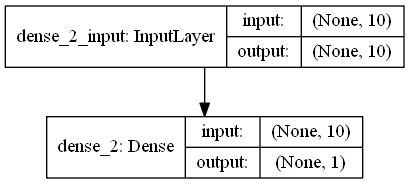

In [34]:
plot_model(sigmoid_model, to_file='sigmoid_model.png', show_shapes=True, rankdir='TB', 
      expand_nested=True, show_layer_names=True, dpi=96)

In [35]:
sigmoid_model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_2 (Dense)              (None, 1)                 11        
Total params: 11
Trainable params: 11
Non-trainable params: 0
_________________________________________________________________


<font size=5  color='blue'>
    
Compiling the model. Includes the optimizer definition

In [36]:
sgd = optimizers.SGD(lr=0.01)

sigmoid_model.compile(loss='mean_squared_error', optimizer=sgd)


<font size=5 color='blue'>
    
Training the learning system

In [37]:
# 10 % of the training data will be used to validate the training
validation_portion = 0.1
epochs = 600

history = sigmoid_model.fit(train_x, train_y, epochs=epochs, validation_split = validation_portion, verbose=2)

# the "history" object contains information generated during training

Train on 357 samples, validate on 40 samples
Epoch 1/600
 - 0s - loss: 0.9023 - val_loss: 0.7063
Epoch 2/600
 - 0s - loss: 0.6732 - val_loss: 0.6169
Epoch 3/600
 - 0s - loss: 0.6145 - val_loss: 0.5823
Epoch 4/600
 - 0s - loss: 0.5877 - val_loss: 0.5654
Epoch 5/600
 - 0s - loss: 0.5728 - val_loss: 0.5577
Epoch 6/600
 - 0s - loss: 0.5625 - val_loss: 0.5463
Epoch 7/600
 - 0s - loss: 0.5530 - val_loss: 0.5408
Epoch 8/600
 - 0s - loss: 0.5478 - val_loss: 0.5340
Epoch 9/600
 - 0s - loss: 0.5431 - val_loss: 0.5279
Epoch 10/600
 - 0s - loss: 0.5402 - val_loss: 0.5235
Epoch 11/600
 - 0s - loss: 0.5373 - val_loss: 0.5236
Epoch 12/600
 - 0s - loss: 0.5359 - val_loss: 0.5233
Epoch 13/600
 - 0s - loss: 0.5351 - val_loss: 0.5214
Epoch 14/600
 - 0s - loss: 0.5336 - val_loss: 0.5217
Epoch 15/600
 - 0s - loss: 0.5322 - val_loss: 0.5185
Epoch 16/600
 - 0s - loss: 0.5312 - val_loss: 0.5170
Epoch 17/600
 - 0s - loss: 0.5301 - val_loss: 0.5170
Epoch 18/600
 - 0s - loss: 0.5292 - val_loss: 0.5193
Epoch 19/6

Epoch 154/600
 - 0s - loss: 0.5239 - val_loss: 0.4987
Epoch 155/600
 - 0s - loss: 0.5241 - val_loss: 0.4983
Epoch 156/600
 - 0s - loss: 0.5247 - val_loss: 0.4988
Epoch 157/600
 - 0s - loss: 0.5242 - val_loss: 0.5012
Epoch 158/600
 - 0s - loss: 0.5239 - val_loss: 0.5001
Epoch 159/600
 - 0s - loss: 0.5238 - val_loss: 0.4983
Epoch 160/600
 - 0s - loss: 0.5243 - val_loss: 0.4984
Epoch 161/600
 - 0s - loss: 0.5235 - val_loss: 0.4989
Epoch 162/600
 - 0s - loss: 0.5239 - val_loss: 0.4937
Epoch 163/600
 - 0s - loss: 0.5250 - val_loss: 0.4922
Epoch 164/600
 - 0s - loss: 0.5238 - val_loss: 0.4919
Epoch 165/600
 - 0s - loss: 0.5245 - val_loss: 0.4942
Epoch 166/600
 - 0s - loss: 0.5241 - val_loss: 0.4969
Epoch 167/600
 - 0s - loss: 0.5237 - val_loss: 0.4951
Epoch 168/600
 - 0s - loss: 0.5236 - val_loss: 0.4946
Epoch 169/600
 - 0s - loss: 0.5235 - val_loss: 0.4955
Epoch 170/600
 - 0s - loss: 0.5239 - val_loss: 0.4947
Epoch 171/600
 - 0s - loss: 0.5249 - val_loss: 0.4938
Epoch 172/600
 - 0s - loss: 

Epoch 306/600
 - 0s - loss: 0.5235 - val_loss: 0.4934
Epoch 307/600
 - 0s - loss: 0.5232 - val_loss: 0.4924
Epoch 308/600
 - 0s - loss: 0.5240 - val_loss: 0.4947
Epoch 309/600
 - 0s - loss: 0.5237 - val_loss: 0.4950
Epoch 310/600
 - 0s - loss: 0.5236 - val_loss: 0.4931
Epoch 311/600
 - 0s - loss: 0.5232 - val_loss: 0.4930
Epoch 312/600
 - 0s - loss: 0.5229 - val_loss: 0.4918
Epoch 313/600
 - 0s - loss: 0.5230 - val_loss: 0.4899
Epoch 314/600
 - 0s - loss: 0.5236 - val_loss: 0.4905
Epoch 315/600
 - 0s - loss: 0.5235 - val_loss: 0.4917
Epoch 316/600
 - 0s - loss: 0.5235 - val_loss: 0.4932
Epoch 317/600
 - 0s - loss: 0.5242 - val_loss: 0.4925
Epoch 318/600
 - 0s - loss: 0.5229 - val_loss: 0.4925
Epoch 319/600
 - 0s - loss: 0.5234 - val_loss: 0.4916
Epoch 320/600
 - 0s - loss: 0.5238 - val_loss: 0.4923
Epoch 321/600
 - 0s - loss: 0.5235 - val_loss: 0.4922
Epoch 322/600
 - 0s - loss: 0.5230 - val_loss: 0.4913
Epoch 323/600
 - 0s - loss: 0.5237 - val_loss: 0.4895
Epoch 324/600
 - 0s - loss: 

Epoch 458/600
 - 0s - loss: 0.5231 - val_loss: 0.4991
Epoch 459/600
 - 0s - loss: 0.5236 - val_loss: 0.4986
Epoch 460/600
 - 0s - loss: 0.5232 - val_loss: 0.4985
Epoch 461/600
 - 0s - loss: 0.5236 - val_loss: 0.5030
Epoch 462/600
 - 0s - loss: 0.5229 - val_loss: 0.5006
Epoch 463/600
 - 0s - loss: 0.5232 - val_loss: 0.4995
Epoch 464/600
 - 0s - loss: 0.5234 - val_loss: 0.4992
Epoch 465/600
 - 0s - loss: 0.5233 - val_loss: 0.4989
Epoch 466/600
 - 0s - loss: 0.5224 - val_loss: 0.4942
Epoch 467/600
 - 0s - loss: 0.5233 - val_loss: 0.4936
Epoch 468/600
 - 0s - loss: 0.5230 - val_loss: 0.4954
Epoch 469/600
 - 0s - loss: 0.5229 - val_loss: 0.4955
Epoch 470/600
 - 0s - loss: 0.5232 - val_loss: 0.4943
Epoch 471/600
 - 0s - loss: 0.5226 - val_loss: 0.4946
Epoch 472/600
 - 0s - loss: 0.5227 - val_loss: 0.4966
Epoch 473/600
 - 0s - loss: 0.5226 - val_loss: 0.4990
Epoch 474/600
 - 0s - loss: 0.5232 - val_loss: 0.5011
Epoch 475/600
 - 0s - loss: 0.5233 - val_loss: 0.4990
Epoch 476/600
 - 0s - loss: 

<font size=5 color='blue'>

Plots of cost function versus epoch    

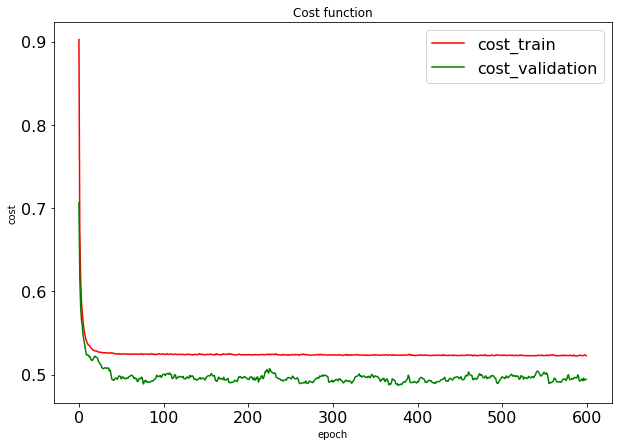

In [38]:
plt.figure(figsize=(10, 7))

plt.plot(history.history['loss'], color='red')
plt.plot(history.history['val_loss'], color='green')
plt.title('Cost function')
plt.ylabel('cost')
plt.xlabel('epoch')
plt.legend(['cost_train', 'cost_validation'])
plt.show()


<font size=5 color='blue'>

Underfitting

<font size=5 color='blue'>
    
# <center> Now we will construct new non linear models: Artificial Neural Networks </center> 

<font size=5 color='black'>
<center> SEM images of a neuron and a network of neurons. Neuron model and mathematical model of a neuron </center>    


<table>
  <tr>
    <td>Neuron</td>
     <td>Network of neurons</td>
      <td>Neuron model</td>
      <td>Mathematical model of a neuron</td>
         
  </tr>
  <tr>
    <td><img src="images\neuron_SEM.jpg" width=290 height=480></td>
    <td><img src="images\human-neuron.png" width=270 height=480></td>
    <td><img src="images\Neuron_labelled.png" width=200 height=380></td>
    <td><img src="images\neuron-mat-model.png" width=370 height=380></td>
  </tr>
 </table>

<font size=5 color='black'>
<center> Approximation by Superpositions of a Sigmoidal Function </center>    

<font size=4 color='black'>
$\bf Abstract$-In this paper we demonstrate that finite linear combinations of com-
positions of a fixed, univariate function and a set ofaffine functionals can uniformly
approximate any continuous function of n real variables with support in the unit
hypercube; only mild conditions are imposed on the univariate function. Our
results settle an open question about representability in the class of single bidden
layer neural networks. In particular, we show that arbitrary decision regions can
be arbitrarily well approximated by continuous feedforward neural networks with
only a single internal, hidden layer and any continuous sigmoidal nonlinearity. The
paper discusses approximation properties of other possible types of nonlinearities
that might be implemented by artificial neural networks.
    
[Reference](./Literatura/Approx-superpositions-sigmoids_1989.pdf)

<font size=5 color='black'>
<center> Approximation Capabilities of Multilayer Feedforward Networks </center>    

<font size=4 color='black'>
$\bf Abstract$--We show that standard multilayer feedfbrward networks with as few as a single hidden layer and
arbitrary bounded and nonconstant activation function are universal approximators with respect to LP(lt) per-
formance criteria, for arbitrary finite input environment measures p, provided only that sufficiently many hidden
units are available. If the activation function is continuous, bounded and nonconstant, then continuous mappings
can be learned uniformly over compact input sets. We also give very general conditions ensuring that networks
with sufficiently smooth activation functions are capable of arbitrarily accurate approximation to a_Function and
its derivatives.
    
[Reference](./Literatura/FF-NN-universal-Approximator_1991.pdf)

<font size=5 color='blue'>
    
Model using three neurons. Full-Connected Feedforward Network (FF). The activation function of the last neuron is linear


It has 3 layers,
with the following number of nodes per layer [10, 2, 1]


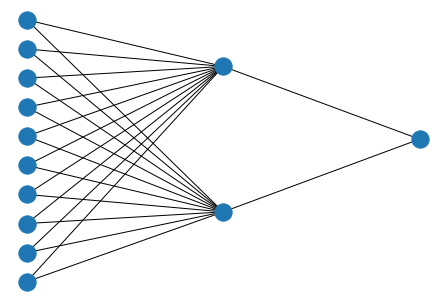

In [39]:
n_x = train_x.shape[1] 
n_h = 2
n_y = train_y.shape[1]
    
layers = [n_x, n_h, n_y]
net = Network(layers)
net.graph(layers)

<font size=5 color='blue'>
    
Model architecture 


In [40]:
np.random.seed(1)

input_nodes = n_x     # The input layer has n_x nodes
hlayer1_nodes = n_h   # The first hidden layer has n_h nodes
output_nodes = n_y    # The output layer has n_y nodes

model1 = Sequential()

model1.add(Dense(hlayer1_nodes,  kernel_initializer='uniform', bias_initializer='zeros', \
                input_dim=input_nodes, activation='tanh'))

model1.add(Dense(output_nodes, kernel_initializer='uniform', bias_initializer='zeros', activation='linear'))


<font size=5 color='blue'>
Architecture Summary and Chart

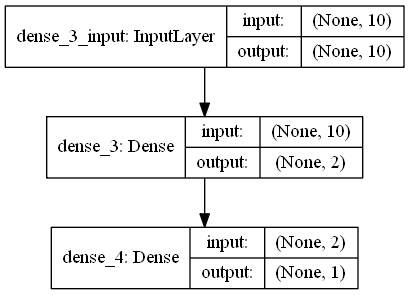

In [41]:
plot_model(model1, to_file='model1.png', show_shapes=True, rankdir='TB', 
      expand_nested=True, show_layer_names=True, dpi=96)

In [42]:
model1.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_3 (Dense)              (None, 2)                 22        
_________________________________________________________________
dense_4 (Dense)              (None, 1)                 3         
Total params: 25
Trainable params: 25
Non-trainable params: 0
_________________________________________________________________


<font size=5  color='blue'>
    
Compiling the model. Includes the optimizer definition

In [43]:
sgd = optimizers.SGD(lr=0.01)

model1.compile(loss='mean_squared_error', optimizer=sgd)

<font size=5 color='blue'>
    
Training the learning system

In [44]:
validation_portion = 0.1
epochs = 600

history = model1.fit(train_x, train_y, epochs=epochs, validation_split = validation_portion, verbose=0)

<font size=5 color='blue'>

Plots of cost function versus epoch    

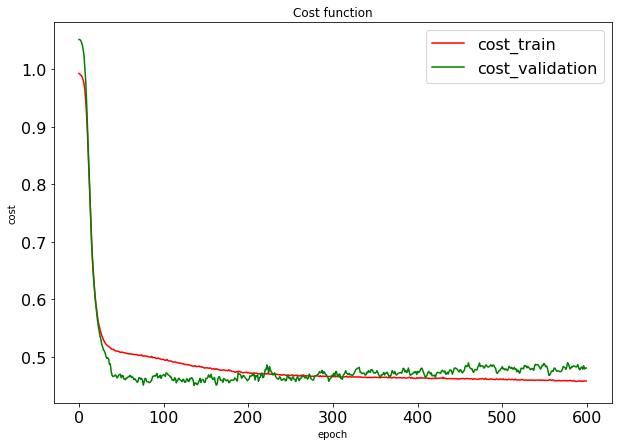

In [45]:
plt.figure(figsize=(10, 7))

plt.plot(history.history['loss'], color='red')
plt.plot(history.history['val_loss'], color='green')
plt.title('Cost function')
plt.ylabel('cost')
plt.xlabel('epoch')
plt.legend(['cost_train', 'cost_validation'])
plt.show()


<font size=5 color='blue'>

A good model

<font size=5 color='blue'>
    
# <center> ---The following is a new model--- </center> 

<font size=5 color='blue'>
    
Model using three neurons. The activation function of the last neuron is sigmoid type


It has 3 layers,
with the following number of nodes per layer [10, 2, 1]


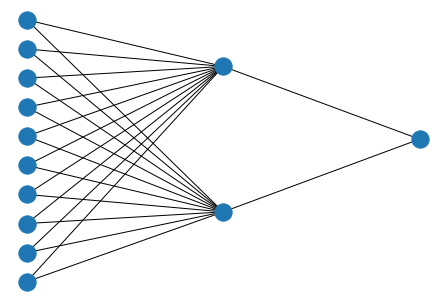

In [46]:
n_x = train_x.shape[1] 
n_h = 2
n_y = train_y.shape[1]
    
layers = [n_x, n_h, n_y]
net = Network(layers)
net.graph(layers)

<font size=5 color='blue'>
    
Model architecture 


In [47]:
np.random.seed(1)

input_nodes = n_x     # The input layer has n_x nodes
hlayer1_nodes = n_h   # The first hidden layer has n_h nodes
output_nodes = n_y    # The output layer has n_y nodes

model2 = Sequential()

model2.add(Dense(hlayer1_nodes,  kernel_initializer='uniform', bias_initializer='zeros', \
                input_dim=input_nodes, activation='tanh'))

model2.add(Dense(output_nodes, kernel_initializer='uniform', bias_initializer='zeros', activation='tanh'))

<font size=5 color='blue'>
Architecture Summary and Chart

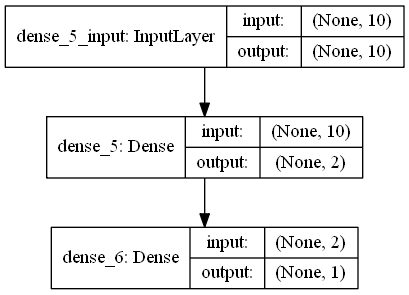

In [48]:
plot_model(model2, to_file='model2.png', show_shapes=True, rankdir='TB', 
      expand_nested=True, show_layer_names=True, dpi=96)

In [49]:
model2.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_5 (Dense)              (None, 2)                 22        
_________________________________________________________________
dense_6 (Dense)              (None, 1)                 3         
Total params: 25
Trainable params: 25
Non-trainable params: 0
_________________________________________________________________


<font size=5  color='blue'>
    
Compiling the model. Includes the optimizer definition

In [50]:
sgd = optimizers.SGD(lr=0.01)

model2.compile(loss='mean_squared_error', optimizer=sgd)

<font size=5 color='blue'>
    
Training the learning system

In [51]:
validation_portion = 0.1
epochs = 600

history = model2.fit(train_x, train_y, epochs=epochs, validation_split = validation_portion, verbose=0)

<font size=5 color='blue'>

Plots of cost function versus epoch    

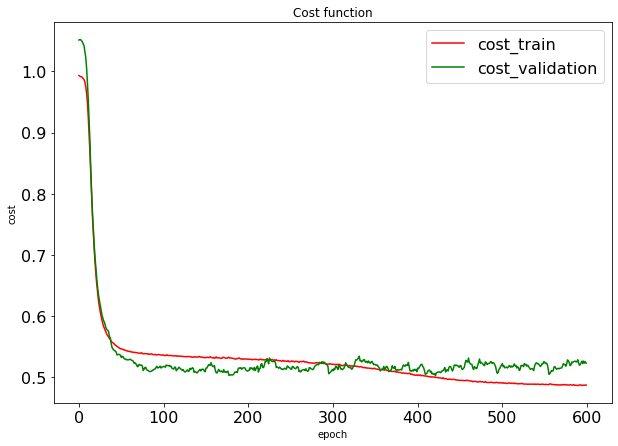

In [52]:
plt.figure(figsize=(10, 7))

plt.plot(history.history['loss'], color='red')
plt.plot(history.history['val_loss'], color='green')
plt.title('Cost function')
plt.ylabel('cost')
plt.xlabel('epoch')
plt.legend(['cost_train', 'cost_validation'])
plt.show()


<font size=5 color='blue'>

Overfitting

<font size=5 color='blue'>
    
# <center> ---The following is a new model--- </center> 

<font size=5 color='blue'>
    
Model using four neurons. The activation function of the last neuron is linear


It has 3 layers,
with the following number of nodes per layer [10, 3, 1]


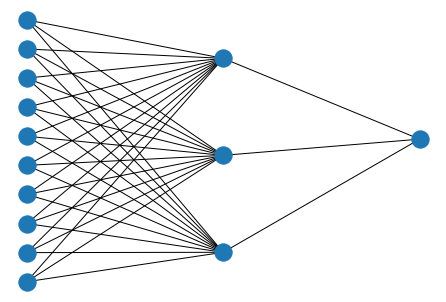

In [53]:
n_x = train_x.shape[1] 
n_h = 3
n_y = train_y.shape[1]
    
layers = [n_x, n_h, n_y]
net = Network(layers)
net.graph(layers)

<font size=5 color='blue'>
    
Model architecture 


In [54]:
np.random.seed(1)

model3 = Sequential()

input_nodes = n_x     #input layer has n_x nodes
hlayer1_nodes = n_h   #first hidden layer has n_h nodes
output_nodes = n_y    #output layer has n_y nodes

model3.add(Dense(hlayer1_nodes,  kernel_initializer='uniform', bias_initializer='zeros', \
                input_dim=input_nodes, activation='tanh'))

model3.add(Dense(output_nodes, kernel_initializer='uniform', bias_initializer='zeros', activation='linear'))

<font size=5 color='blue'>
Architecture Summary and Chart

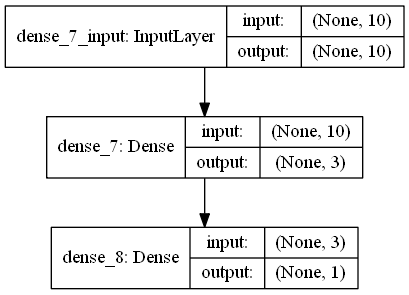

In [55]:
plot_model(model3, to_file='model3.png', show_shapes=True, rankdir='TB', 
      expand_nested=True, show_layer_names=True, dpi=96)

In [56]:
model3.summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_7 (Dense)              (None, 3)                 33        
_________________________________________________________________
dense_8 (Dense)              (None, 1)                 4         
Total params: 37
Trainable params: 37
Non-trainable params: 0
_________________________________________________________________


<font size=5  color='blue'>
    
Compiling the model. Includes the optimizer definition.

In [57]:
sgd = optimizers.SGD(lr=0.01)

model3.compile(loss='mean_squared_error', optimizer=sgd)

<font size=5 color='blue'>
    
Training the learning system

In [58]:
validation_portion = 0.1
epochs = 600

history = model3.fit(train_x, train_y, epochs=epochs, validation_split = validation_portion, verbose=0)

<font size=5 color='blue'>

Plots of cost function versus epoch    

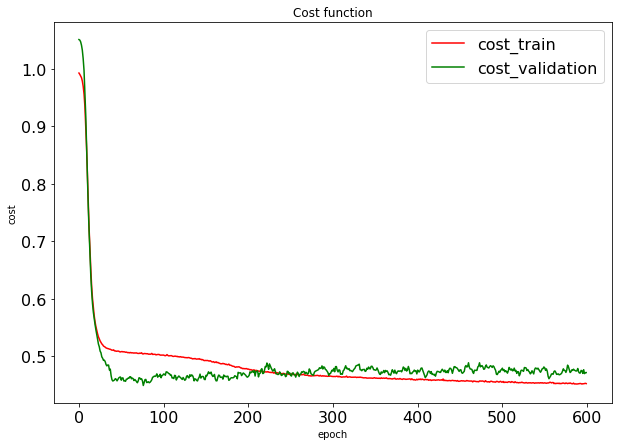

In [59]:
plt.figure(figsize=(10, 7))

plt.plot(history.history['loss'], color='red')
plt.plot(history.history['val_loss'], color='green')
plt.title('Cost function')
plt.ylabel('cost')
plt.xlabel('epoch')
plt.legend(['cost_train', 'cost_validation'])
plt.show()


<font size=5 color='blue'>

Overfitting

<font size=5 color='blue'>
    
# <center> ---The following is a new model--- </center> 

<font size=5 color='blue'>
    
Model using five neurons. The activation function of the last neuron is linear


It has 3 layers,
with the following number of nodes per layer [10, 4, 1]


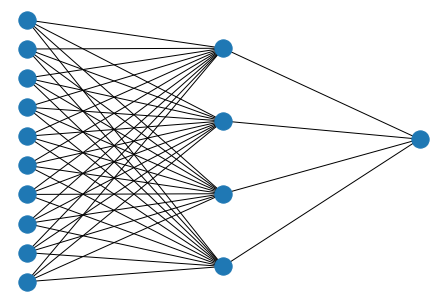

In [60]:
n_x = train_x.shape[1] 
n_h = 4
n_y = train_y.shape[1]
    
layers = [n_x, n_h, n_y]
net = Network(layers)
net.graph(layers)

<font size=5 color='blue'>
    
Model architecture 


In [61]:
np.random.seed(1)

input_nodes = n_x     # The input layer has n_x nodes
hlayer1_nodes = n_h   # The first hidden layer has n_h nodes
output_nodes = n_y    # The output layer has n_y nodes


model4 = Sequential()

model4.add(Dense(hlayer1_nodes,  kernel_initializer='uniform', bias_initializer='zeros', \
                input_dim=input_nodes, activation='tanh'))

model4.add(Dense(output_nodes, kernel_initializer='uniform', bias_initializer='zeros', activation='linear'))

<font size=5 color='blue'>
Architecture Summary and Chart

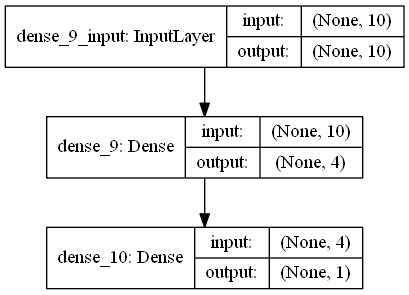

In [62]:
plot_model(model4, to_file='model4.png', show_shapes=True, rankdir='TB', 
      expand_nested=True, show_layer_names=True, dpi=96)

In [63]:
model4.summary()

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_9 (Dense)              (None, 4)                 44        
_________________________________________________________________
dense_10 (Dense)             (None, 1)                 5         
Total params: 49
Trainable params: 49
Non-trainable params: 0
_________________________________________________________________


<font size=5  color='blue'>
    
Compiling the model. Includes the optimizer definition.

In [64]:
sgd = optimizers.SGD(lr=0.01,)

model4.compile(loss='mean_squared_error', optimizer=sgd)

<font size=5 color='blue'>
    
Training the learning system

In [65]:
validation_portion = 0.1
epochs = 600

history = model4.fit(train_x, train_y, epochs=epochs, validation_split = validation_portion,verbose=0)

<font size=5 color='blue'>

Plots of cost function versus epoch    

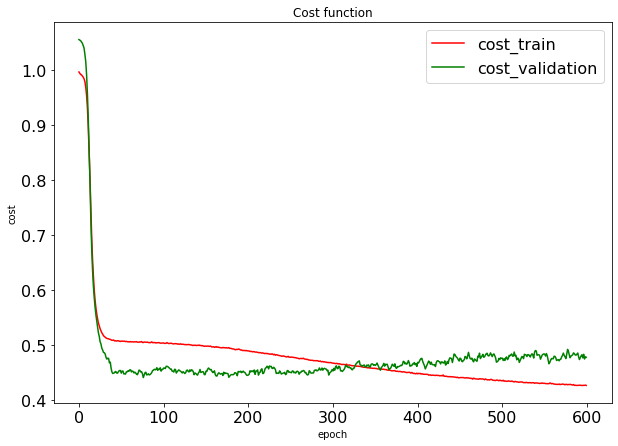

In [66]:
plt.figure(figsize=(10, 7))

plt.plot(history.history['loss'], color='red')
plt.plot(history.history['val_loss'], color='green')
plt.title('Cost function')
plt.ylabel('cost')
plt.xlabel('epoch')
plt.legend(['cost_train', 'cost_validation'])
plt.show()


<font size=5 color='blue'>

Overfitting   

<font size=5 color='blue'>
    
# <center> ---The following is a new model--- </center> 

<font size=5 color='blue'>
    
Model using ten neurons. The activation function of the last neuron is linear


It has 4 layers,
with the following number of nodes per layer [10, 5, 4, 1]


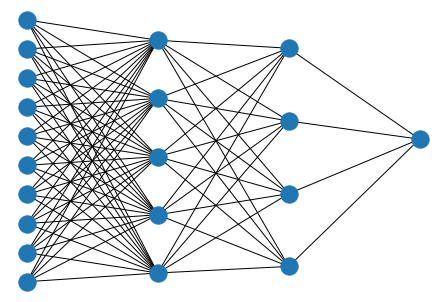

In [67]:
n_x = train_x.shape[1] 
n_h1 = 5
n_h2  = 4
n_y = train_y.shape[1]
    
layers = [n_x, n_h1, n_h2, n_y]
net = Network(layers)
net.graph(layers)

<font size=5 color='blue'>
    
Model architecture 


In [68]:
np.random.seed(1)

input_nodes = n_x     # The input layer has n_x nodes
hlayer1_nodes = n_h1  # The first hidden layer has n_h1 nodes
hlayer2_nodes = n_h2  # The second hidden layes has n_h2 nodes
output_nodes = n_y    # The output layer has n_y nodes


model5 = Sequential()

model5.add(Dense(hlayer1_nodes,  kernel_initializer='uniform', bias_initializer='zeros', \
                input_dim=input_nodes, activation='tanh'))

model5.add(Dense(hlayer2_nodes,  kernel_initializer='uniform', bias_initializer='zeros', \
                input_dim=input_nodes, activation='tanh'))


model5.add(Dense(output_nodes, kernel_initializer='uniform', bias_initializer='zeros', activation='linear'))

<font size=5 color='blue'>
Architecture Summary and Chart

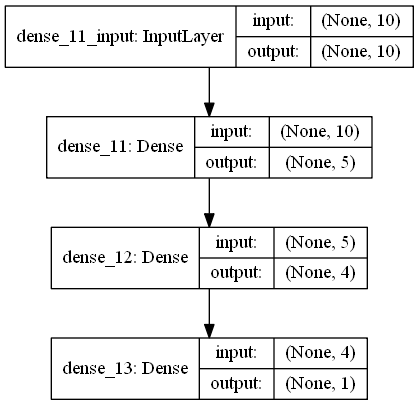

In [69]:
plot_model(model5, to_file='model5.png', show_shapes=True, rankdir='TB', 
      expand_nested=True, show_layer_names=True, dpi=96)

In [70]:
model5.summary()

Model: "sequential_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_11 (Dense)             (None, 5)                 55        
_________________________________________________________________
dense_12 (Dense)             (None, 4)                 24        
_________________________________________________________________
dense_13 (Dense)             (None, 1)                 5         
Total params: 84
Trainable params: 84
Non-trainable params: 0
_________________________________________________________________


<font size=5  color='blue'>
    
Compiling the model. Includes the optimizer definition.

In [71]:
sgd = optimizers.SGD(lr=0.01,)

model5.compile(loss='mean_squared_error', optimizer=sgd)

<font size=5 color='blue'>
    
Training the learning system

In [72]:
validation_portion = 0.1
epochs = 600

history = model5.fit(train_x, train_y, epochs=epochs, validation_split = validation_portion,verbose=0)

<font size=5 color='blue'>

Plots of cost function versus epoch    

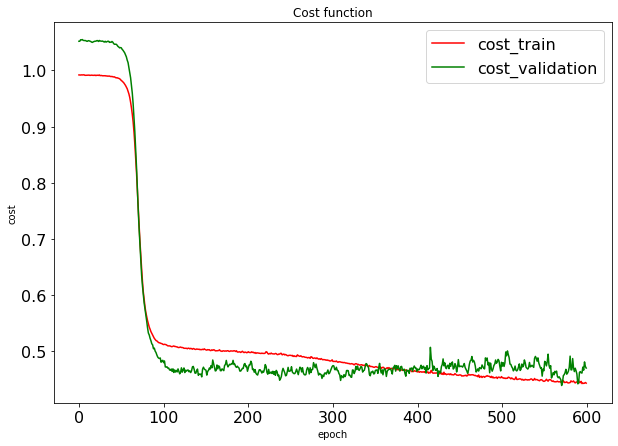

In [73]:
plt.figure(figsize=(10, 7))

plt.plot(history.history['loss'], color='red')
plt.plot(history.history['val_loss'], color='green')
plt.title('Cost function')
plt.ylabel('cost')
plt.xlabel('epoch')
plt.legend(['cost_train', 'cost_validation'])
plt.show()


<font size=5 color='blue'>

Overfitting    